In [1]:
import numpy as np
import pandas as pd
# for datavisualization
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Performance1.csv')
df

,Province,City,Area,Company,Status,Delivery Time,Delivery Charges
0,Sindh,Hyderababd,Main,BLUEX,Delivered,13 Days,150
1,Punjab,Jampur,Main,BLUEX,Delivered,10 Days,150
2,Sindh,KARACHI,Main,BLUEX,Delivered,6 Days,150
3,Punjab,Wah Cantt,Tehsil,BLUEX,Delivered,9 Days,150
4,Sindh,Karachi,Main,BLUEX,Delivered,6 Days,150
5,Punjab,Hasilpur,Main,BLUEX,Delivered,6 Days,150
6,Punjab,Multan,Main,BLUEX,Delivered,7 Days,150
7,Punjab,Gujranwala,Main,BLUEX,Delivered,5 Days,150
8,Punjab,Rawalpindi,Main,BLUEX,Delivered,6 Days,150
9,Sindh,Karachi,Main,BLUEX,Delivered,6 Days,150


In [3]:
df.head()

,Province,City,Area,Company,Status,Delivery Time,Delivery Charges
0,Sindh,Hyderababd,Main,BLUEX,Delivered,13 Days,150
1,Punjab,Jampur,Main,BLUEX,Delivered,10 Days,150
2,Sindh,KARACHI,Main,BLUEX,Delivered,6 Days,150
3,Punjab,Wah Cantt,Tehsil,BLUEX,Delivered,9 Days,150
4,Sindh,Karachi,Main,BLUEX,Delivered,6 Days,150


In [4]:
x = df.Company.drop_duplicates()
x

0     BLUEX
65     TRAX
Name: Company, dtype: object

In [5]:
df["Delivery Time"].head()

0    13 Days
1    10 Days
2     6 Days
3     9 Days
4     6 Days
Name: Delivery Time, dtype: object

In [6]:
df[['Days','_']] = df["Delivery Time"].str.split(" ",expand=True,)
df['Days'].head()

0    13
1    10
2     6
3     9
4     6
Name: Days, dtype: object

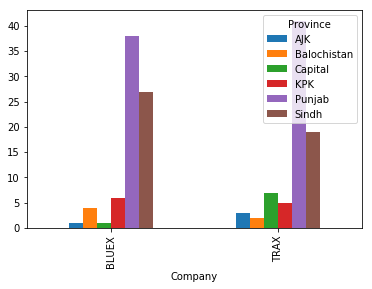

In [7]:
# Q6 which company is best according to each province
df1=df.groupby(['Company','Province']).size()
df1=df1.unstack()
df1.plot(kind='bar')

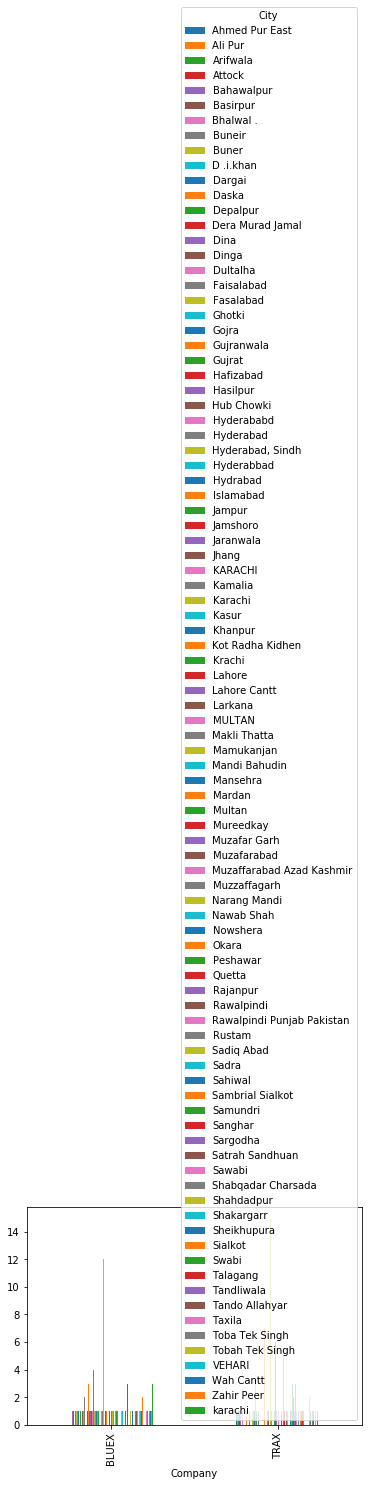

In [8]:
df7=df.groupby(['Company', 'City']).size()
df7=df7.unstack()
df7.plot(kind='bar')

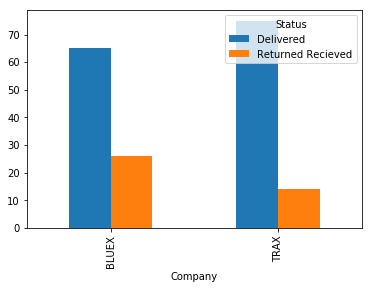

In [9]:
df2=df.groupby(['Company','Status']).size()
df2=df2.unstack()
df2.plot(kind='bar')

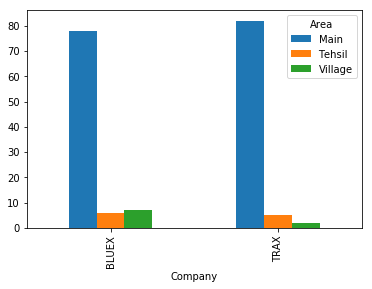

In [10]:
# Q2	Which Company is best in Main, Tehsil and Villages?
df3=df.groupby(['Company','Area']).size()
df3=df3.unstack()
df3.plot(kind='bar')

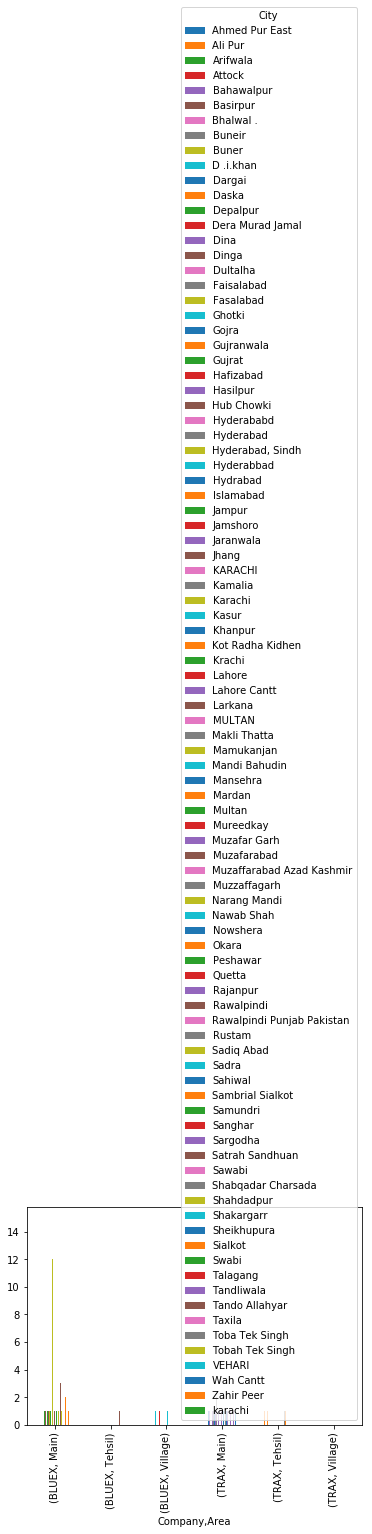

In [11]:
df3=df.groupby(['Company','Area', 'City']).size()
df3=df3.unstack()
df3.plot(kind='bar')

In [13]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26822 sha256=93b7a8bcc7fef7a071ff2d10fb4a4d75675741c4542750b6d4073f57a15371d8
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\5c\4b\ec\41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


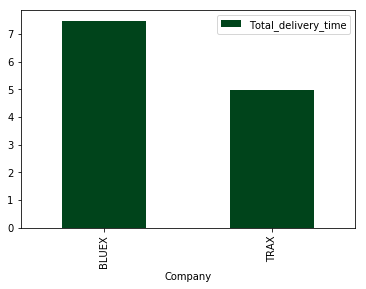

In [17]:
# Q1	Which Company is best in quick delivery?
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
query_delivery_time = '''select avg("Days") as Total_delivery_time, "Company" from df group by "Company";'''
delv_time = pysqldf(query_delivery_time)
#bluex_dt = df.Company.value_counts()['BLUEX']
#trax_dt = df.Company.value_counts()['TRAX']
delv_time.plot.bar(y='Total_delivery_time', x="Company", colormap='BuGn_r')

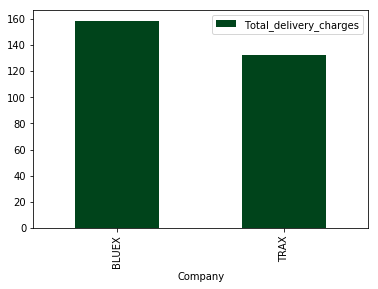

In [18]:
# Q4	Which Company is more expensive?
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
query_delivery_charges = '''select avg("Delivery Charges") as Total_delivery_charges, "Company" from df group by "Company";'''
delv_charges = pysqldf(query_delivery_charges)
#bluex_dt = df.Company.value_counts()['BLUEX']
#trax_dt = df.Company.value_counts()['TRAX']
delv_charges.plot.bar(y='Total_delivery_charges', x="Company", colormap='BuGn_r')

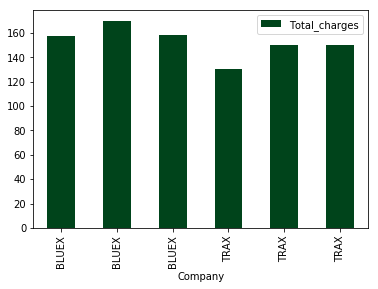

In [43]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
#query_delivery_charges = '''select avg("Delivery Charges") as Total_charges, "Company" from df where "Area"='Main' group by "Company" ;'''
query_delivery_charges = '''select avg("Delivery Charges") as Total_charges, "Company", "Area" from df group by "Company", "Area";'''
delv_charges = pysqldf(query_delivery_charges)
#bluex_dt = df.Company.value_counts()['BLUEX']
#trax_dt = df.Company.value_counts()['TRAX']
delv_charges.plot.bar(y='Total_charges', x="Company", colormap='BuGn_r')

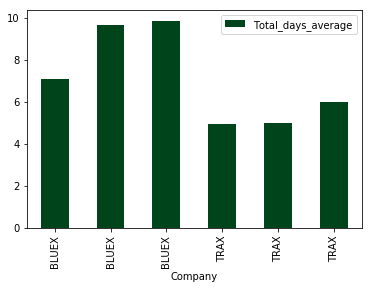

In [45]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
#query_delivery_charges = '''select avg("Delivery Charges") as Total_charges, "Company" from df where "Area"='Main' group by "Company" ;'''
query_delivery_charges = '''select avg("Days") as Total_days_average, "Company", "Area" from df group by "Company", "Area";'''
delv_charges = pysqldf(query_delivery_charges)
#bluex_dt = df.Company.value_counts()['BLUEX']
#trax_dt = df.Company.value_counts()['TRAX']
delv_charges.plot.bar(y='Total_days_average', x="Company", colormap='BuGn_r')

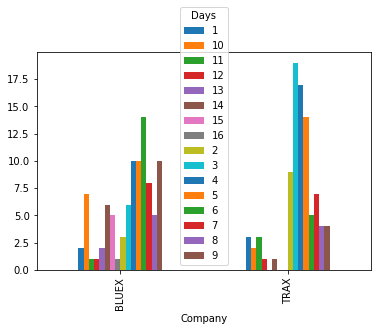

In [38]:
df4=df.groupby(['Company', 'Days']).size()
df4=df4.unstack()
df4.plot(kind='bar')

In [17]:
df.City.drop_duplicates()

0                      Hyderababd
1                          Jampur
2                         KARACHI
3                       Wah Cantt
4                         Karachi
5                        Hasilpur
6                          Multan
7                      Gujranwala
8                      Rawalpindi
10                        Sahiwal
11                        Larkana
12                         Quetta
13                         Lahore
14                         VEHARI
15                   Muzafar Garh
16                     Hyderabbad
19                        karachi
22                     Faisalabad
23                      Hyderabad
28                          Dinga
29                  Mandi Bahudin
31                       Peshawar
33                        Khanpur
35                        Sialkot
36                         Taxila
37                        Kamalia
38                     Shakargarr
39                          Buner
41                      D .i.khan
42            

In [36]:
y = df.Province
y.unique()

array(['Sindh', 'Punjab', 'Balochistan', 'AJK', nan, 'KPK', 'Capital'],
      dtype=object)

In [35]:
#df.plot(x="Company", y="Delivery Time")